In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preproessing

In [2]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

In [3]:
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
main = pd.concat([tr.drop('Survived', axis = 1), te])

In [5]:
main

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
relatives = pd.Series(main['Parch'] + main['SibSp'], name = 'Relatives')

In [7]:
main = pd.concat([main[['Name', 'Pclass', 'Sex', 'Age','Embarked']], relatives], axis = 1)

In [8]:
def ext(name):
    name = name.split(',')[1].split()
    for i in name:
        if i[len(i)-1] == '.':
            return i

In [9]:
main['Name'] = main['Name'].apply(ext)

In [10]:
main.Name.value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Ms.            2
Major.         2
Mlle.          2
Capt.          1
Jonkheer.      1
Countess.      1
Sir.           1
Mme.           1
Dona.          1
Don.           1
Lady.          1
Name: Name, dtype: int64

In [11]:
mean = main['Age'].mean()
std = main['Age'].std()

In [12]:
def check(age):
    if age <= 13:
        return 1
    elif age > 13 and age <= 20:
        return 2
    elif age > 20 and age <= 30:
        return 3
    elif age > 30 and age <= 40:
        return 4
    elif age > 40 and age <= 50:
        return 5
    elif age > 50:
        return 6
    elif pd.isnull(age):
        return check(np.random.randint(mean - std, mean + std, 1)[0])

In [13]:
main['Age'] = main['Age'].apply(check)

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
main['Name']= label_encoder.fit_transform(main['Name'])

In [15]:
main.Name.value_counts()

13    757
10    260
14    197
9      61
16      8
5       8
1       4
8       2
15      2
11      2
4       1
2       1
3       1
17      1
6       1
7       1
12      1
0       1
Name: Name, dtype: int64

In [16]:
main['Name'] = main['Name'].apply(lambda x : x if(x == 13 or x == 10 or x == 14 or x == 9) else 0)

In [17]:
main.Name.unique()

array([13, 14, 10,  9,  0], dtype=int64)

In [18]:
main.Sex = main.Sex.map({'female':1, 'male': 0})

In [19]:
main.Embarked = main.Embarked.map({'S':1, 'C':2, 'Q':3})

In [20]:
main.Embarked.fillna(int(main.Embarked.mode()[0]), inplace = True)

# Exploratory data analysis

In [21]:
temp = pd.concat([main[:len(tr)], tr['Survived']], axis = 1)

In [22]:
corr_age = temp.corr()

# Visualisation of data

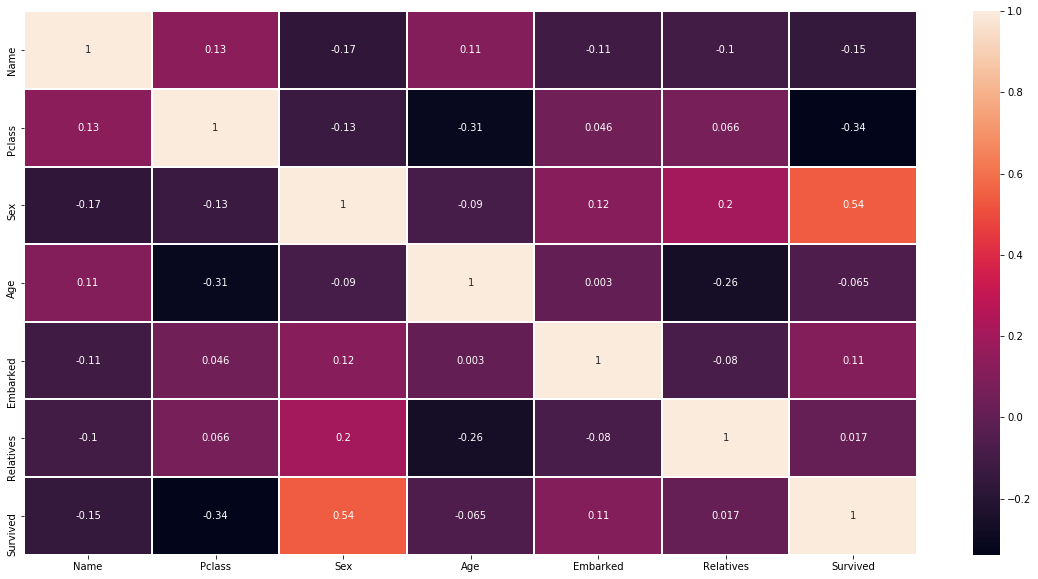

In [23]:
fig, axes = plt.subplots(figsize=(20,10))
sns.heatmap(corr_age, annot = True, linewidth = 1)
plt.show()

this corelation matrix shows us that Name, Embarked, Fare, Sex, Pclass are of high importances

Let's See some visualisation to see thier results

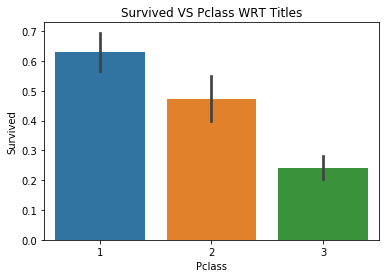

In [24]:
sns.barplot(data = temp , x = 'Pclass', y = 'Survived')
plt.title('Survived VS Pclass WRT Titles')
plt.show()

Here we can see that higher the Pclass, Higher the Survival Chances

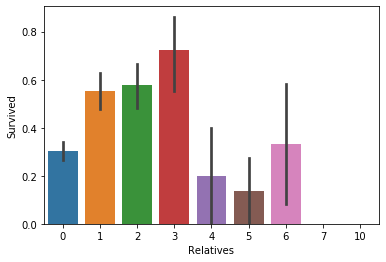

In [25]:
sns.barplot(data = temp, x = 'Relatives', y = 'Survived')
plt.show()

No. of relatives have very high varince so it is not reliable feature.

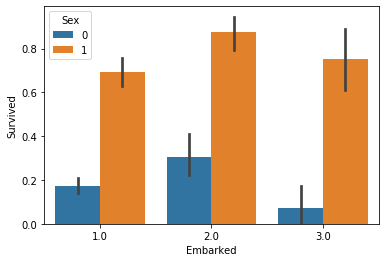

In [26]:
sns.barplot(data = temp, y = 'Survived', x = 'Embarked', hue = 'Sex')
plt.show()

Here we can see that passengers with embarked = 2 have more chances of survival

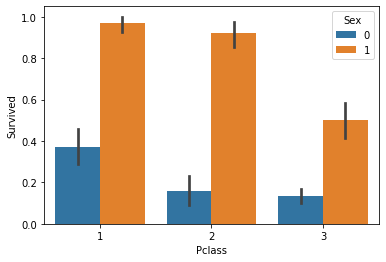

In [27]:
sns.barplot(data = temp, x = 'Pclass', y = 'Survived', hue = 'Sex')
plt.show()

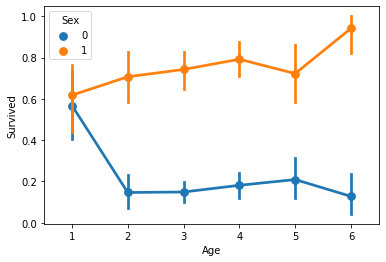

In [28]:
sns.pointplot(data = temp, x='Age', y = 'Survived', hue = 'Sex')
plt.show()

Here we can see that their priority was Female and childrens but else than that, it doesn't show any special corealtions

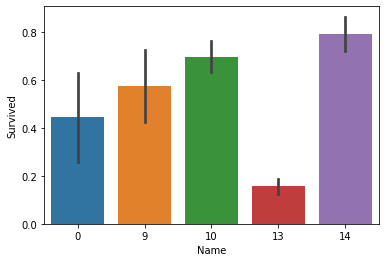

In [29]:
sns.barplot(data = temp, x='Name', y = 'Survived')
plt.show()

In [30]:
main = main[['Name', 'Pclass', 'Sex', 'Age','Embarked']]

In [31]:
main.isnull().sum()

Name        0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [32]:
main.drop('Age',axis = 1, inplace = True)

In [33]:
len(tr)

891

In [34]:
X_train = main.iloc[:len(tr), :].copy()
X_test = main.iloc[len(tr):, :].copy()
Y_train = tr['Survived'].copy()

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [36]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

1) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score
accuracies_LR = cross_val_score(estimator = classifier_LR, X = X_train, y = Y_train, cv = 10)

In [39]:
print('K-Fold Cross Validation accuracy with 10 Folds is', accuracies_LR.mean()*100,'% And it\'s Standard Deviation is',  accuracies_LR.std()*100,'%')
Y_tr_pred = classifier_LR.predict(X_train)
print('Accuracy on training Set', acc(Y_train, Y_tr_pred)*100,'%')

K-Fold Cross Validation accuracy with 10 Folds is 78.56179775280899 % And it's Standard Deviation is 2.5958703960797576 %
Accuracy on training Set 78.67564534231201 %


In [40]:
Y_pred = classifier_LR.predict(X_test)